<a href="https://colab.research.google.com/github/HoangKhaLe/b-i-t-p-n-i-c-m-i-n/blob/main/flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/flower

/content/drive/MyDrive/flower


In [3]:
ls

test/  train/


In [4]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
flower_train = train_datagen.flow_from_directory(
    './train/',
    target_size= (200, 200),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


flower_test = test_data.flow_from_directory(
    './test/', 
    target_size= (200, 200), 
    batch_size = 16,
    class_mode = 'categorical')

Found 2281 images belonging to 3 classes.
Found 216 images belonging to 3 classes.


In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [6]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(flower_train, epochs=20, batch_size=128)

Epoch 1/20
143/143 [==============================] - 784s 5s/step - loss: 1.4048 - accuracy: 0.5436
Epoch 2/20
143/143 [==============================] - 204s 1s/step - loss: 0.7382 - accuracy: 0.6589
Epoch 3/20
143/143 [==============================] - 202s 1s/step - loss: 0.6392 - accuracy: 0.7251
Epoch 4/20
143/143 [==============================] - 201s 1s/step - loss: 0.5136 - accuracy: 0.7896
Epoch 5/20
143/143 [==============================] - 202s 1s/step - loss: 0.3720 - accuracy: 0.8562
Epoch 6/20
143/143 [==============================] - 199s 1s/step - loss: 0.2448 - accuracy: 0.9119
Epoch 7/20
143/143 [==============================] - 207s 1s/step - loss: 0.1558 - accuracy: 0.9500
Epoch 8/20
143/143 [==============================] - 209s 1s/step - loss: 0.1237 - accuracy: 0.9649
Epoch 9/20
143/143 [==============================] - 210s 1s/step - loss: 0.0874 - accuracy: 0.9741
Epoch 10/20
143/143 [==============================] - 202s 1s/step - loss: 0.0755 - accura

In [7]:
model.save('flower.h5')

In [8]:
from keras.models import load_model
model_flower=load_model('flower.h5')

1/1 [==============================] - 0s 162ms/step
Đây là : tulip


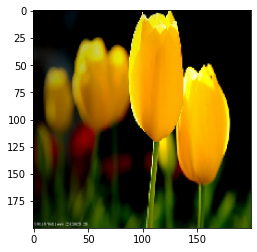

In [10]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/tulip.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

1/1 [==============================] - 0s 48ms/step
Đây là : sunflower


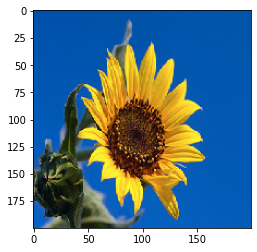

In [11]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/hoahuongduong.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

1/1 [==============================] - 0s 52ms/step
Đây là : rose


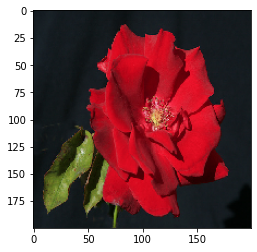

In [12]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/hoahong.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['rose','sunflower','tulip']
h= int(np.argmax(result,axis=1))
print("Đây là :", class_name[h])

In [15]:
!jupyter nbconvert --to html "/content/flower.ipynb"

[NbConvertApp] WARNING | pattern '/content/flower.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute